Chapter 6
# 用指色谱绘制等高线
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify, diff, exp, latex
from sympy.abc import x, y
# 导入符号变量
import os

from matplotlib import cm
# 导入色谱模块

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 1. 定义函数

In [2]:
num = 301; 
# 数列元素数量

x_array = np.linspace(-3,3,num)
y_array = np.linspace(-3,3,num)
xx,yy = np.meshgrid(x_array,y_array)
# 产生网格数据

# 用 sympy 库定义 MATLAB二元函数 peaks()
f_xy =  3*(1-x)**2*exp(-(x**2) - (y+1)**2)\
    - 10*(x/5 - x**3 - y**5)*exp(-x**2-y**2)\
    - 1/3*exp(-(x+1)**2 - y**2) 

f_xy_fcn = lambdify([x,y],f_xy)
# 将符号函数表达式转换为Python函数
ff = f_xy_fcn(xx,yy)

# Reference: 
# https://www.mathworks.com/help/matlab/ref/peaks.html

In [3]:
# 查看函数
f_xy

3*(1 - x)**2*exp(-x**2 - (y + 1)**2) - (-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) - 0.333333333333333*exp(-y**2 - (x + 1)**2)

### 2. 平面等高线，填充

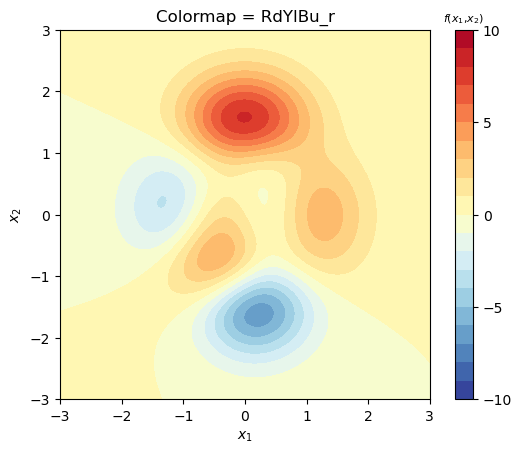

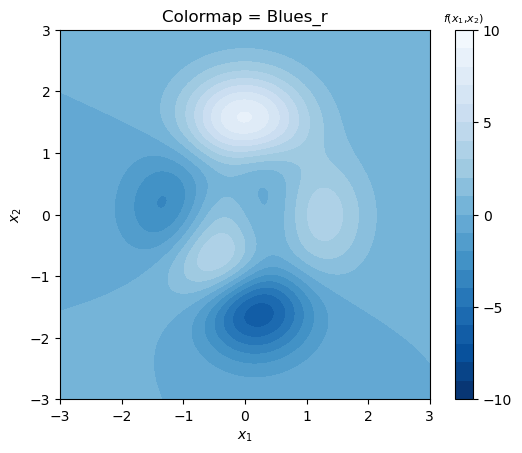

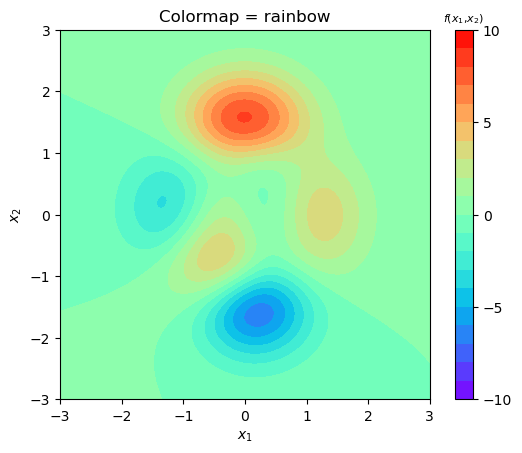

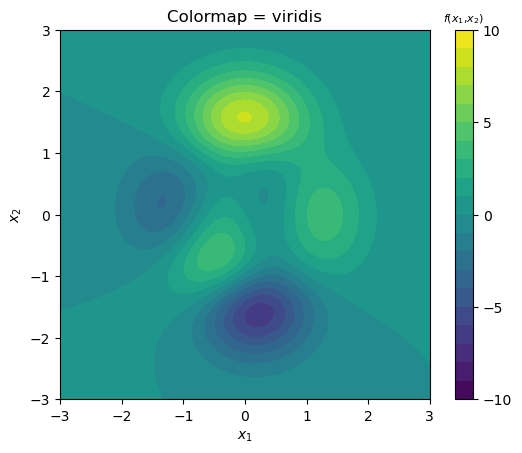

In [4]:
cmap_arrays = ['RdYlBu_r', 'Blues_r', 'rainbow', 'viridis']
# 四种不同色谱

levels = np.linspace(-10, 10, 21)
# 定义等高线高度
# 几幅图采用完全一样的等高线高度

# for 循环绘制四张图片
for cmap_idx in cmap_arrays:
    
    fig, ax = plt.subplots()
    
    colorbar = ax.contourf(xx,yy, ff, levels = levels, cmap=cmap_idx)
    # 绘制平面填充等高线

    cbar = fig.colorbar(colorbar, ax=ax)
    cbar.set_ticks([-10, -5, 0, 5, 10])
    cbar.ax.set_title('$\it{f}$($\it{x_1}$,$\it{x_2}$)',fontsize=8)
    # 增加色谱条，并指定刻度

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # 控制横轴、纵轴取值范围

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.gca().set_aspect('equal', adjustable='box')
    # 横纵轴比例尺1:1
    
    title = 'Colormap = ' + str(cmap_idx)
    plt.title(title)
    # 给图像加标题

    fig.savefig('Figures/平面填充等高线_' + str(cmap_idx) + '.svg', format='svg')


### 3. 平面等高线，非填充

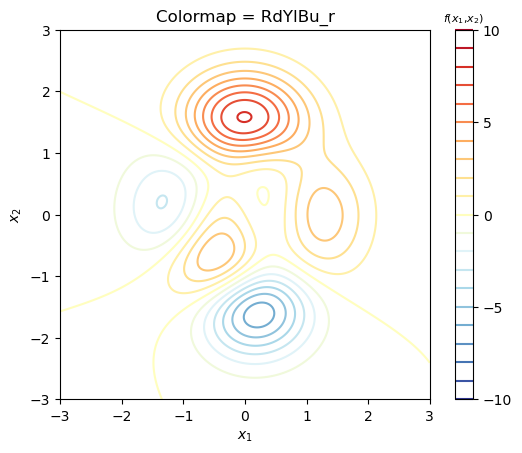

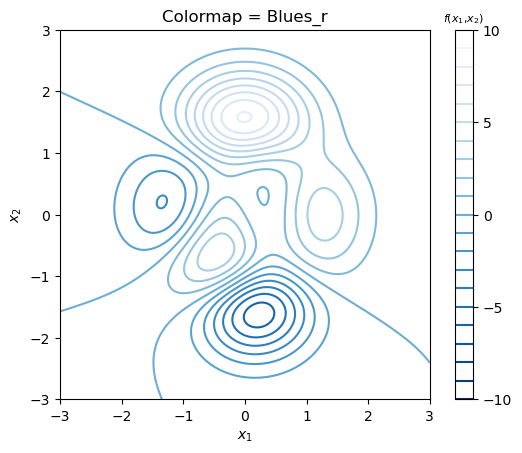

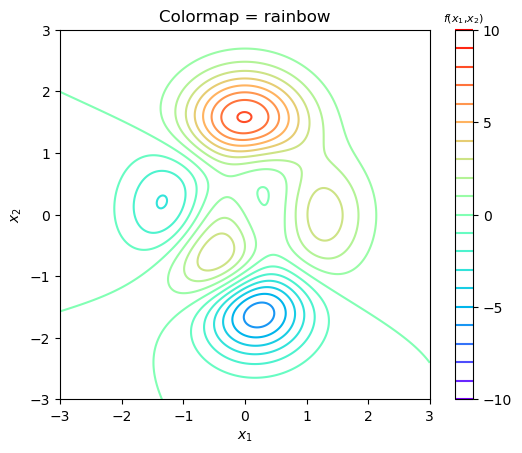

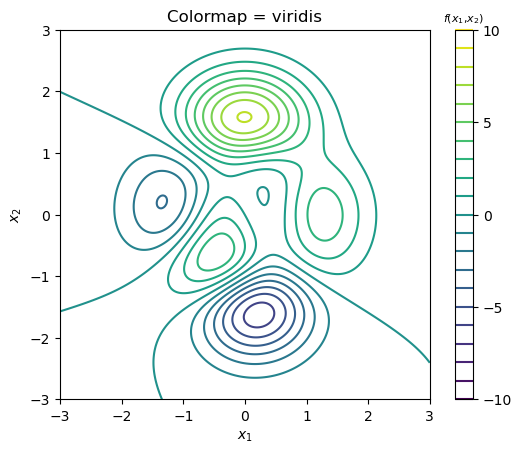

In [14]:
# 请大家自行补充注释

for cmap_idx in cmap_arrays:
    
    fig, ax = plt.subplots()
    
    colorbar = ax.contour(xx,yy, ff, levels = levels, cmap=cmap_idx)
    # 绘制平面等高线，非填充

    cbar = fig.colorbar(colorbar, ax=ax)
    cbar.set_ticks([-10, -5, 0, 5, 10])
    cbar.ax.set_title('$\it{f}$($\it{x_1}$,$\it{x_2}$)',fontsize=8)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    plt.gca().set_aspect('equal', adjustable='box')
    
    title = 'Colormap = ' + str(cmap_idx)
    plt.title(title)

    fig.savefig('Figures/平面等高线_' + str(cmap_idx) + '.svg', format='svg')


In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023